In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from pandas.tools.plotting import autocorrelation_plot
from scipy.optimize import curve_fit

In [49]:
data_types = {'Recall Notification Date': str}
df = pd.read_csv("database.csv", dtype=data_types)

In [50]:
df.dtypes

Record ID                     int64
NHTSA Campaign               object
Manufacturer Campaign        object
Vehicle Make                 object
Vehicle Model                object
Model Year                    int64
Vehicle Manufacturer         object
Recall Type                  object
Recall Component             object
Manufacture Start Date      float64
Manufacture End Date        float64
Estimated Units             float64
Recall Initiative            object
Recall Manufacturer          object
Recall Notification Date     object
dtype: object

In [51]:
df = df.dropna(subset=['Recall Notification Date'])

In [52]:
df['year'] = df['Recall Notification Date'].apply(lambda date: int(str(date)[:4]))

In [81]:
len(set(df['year']))

54

In [62]:
recalls_by_year = df.groupby('year').size()

In [105]:
years = recalls_by_year.index.values[2:-1]
number_of_recalls_per_year = np.array(recalls_by_year.tolist()[2:-1])

In [128]:
number_of_recalls_per_year.shape

(51,)

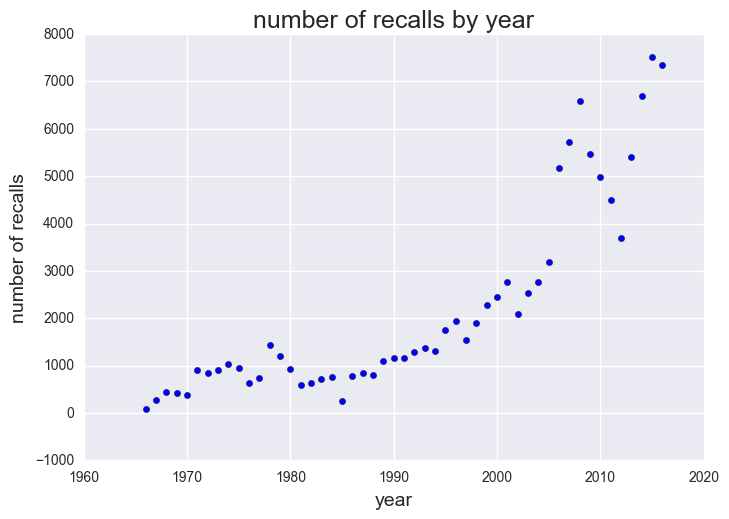

In [106]:
plt.scatter(years, number_of_recalls_per_year)
plt.xlabel('year', fontsize=14)
plt.ylabel('number of recalls', fontsize=14)
plt.title('number of recalls by year', fontsize=18)
plt.show()

In [119]:
def fit_poly_3(x, a0, a1, a2, a3):
    return a0 + a1*x + a2*x**2 + a3*x**3

In [129]:
popt, pcov = curve_fit(fit_poly_3, years, number_of_recalls_per_year)

In [165]:
print(popt)

[ -6.79577521e+08   1.03239007e+06  -5.22796587e+02   8.82482709e-02]


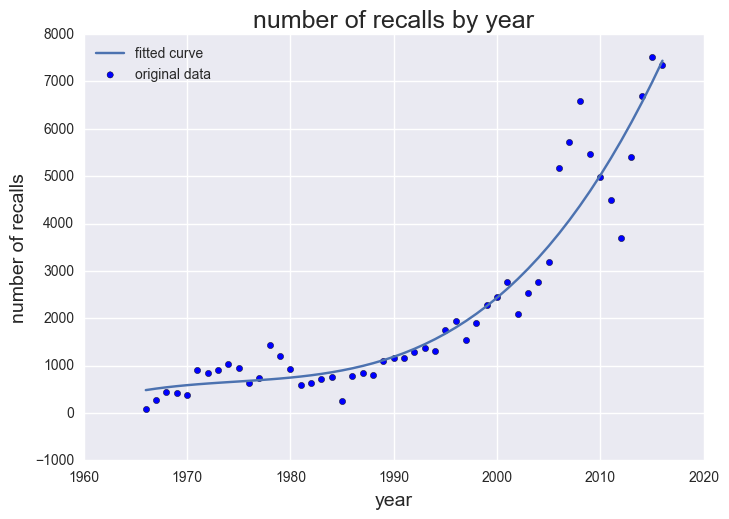

In [154]:
plt.scatter(years, number_of_recalls_per_year, label='original data')
y_prediction_recalls = fit_poly_3(years, *popt)
plt.plot(years, y_prediction_recalls, label='fitted curve')
plt.xlabel('year', fontsize=14)
plt.ylabel('number of recalls', fontsize=14)
plt.title('number of recalls by year', fontsize=18)
plt.legend(loc='upper left')
plt.show()


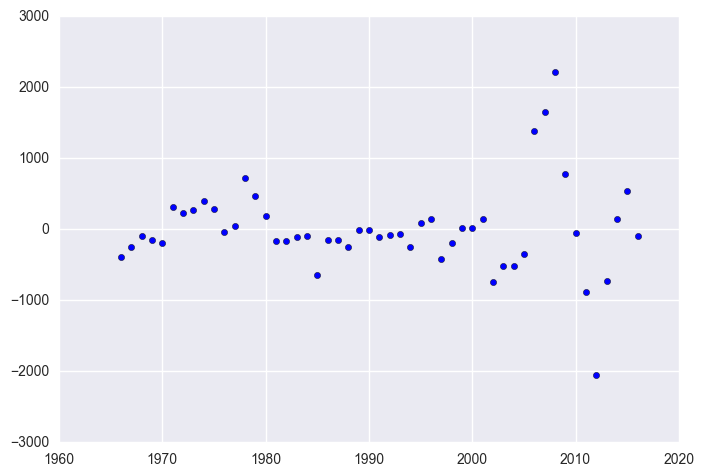

In [155]:
residuals = number_of_recalls_per_year - y_prediction_recalls
plt.scatter(years, residuals)
plt.show()

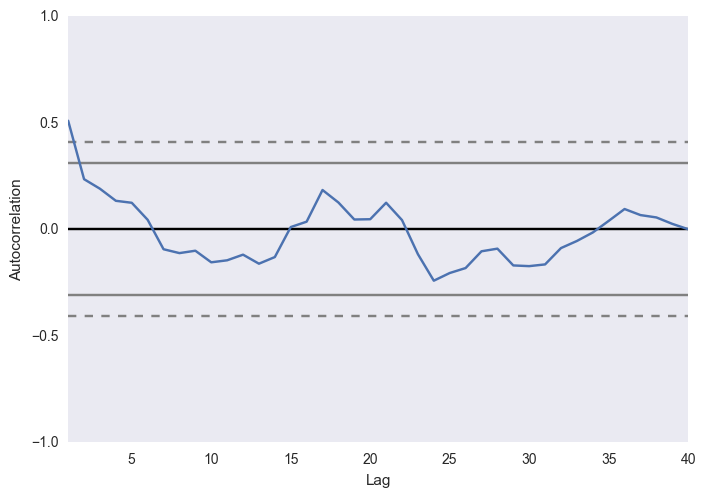

In [168]:
autocorrelation_plot(residuals[:-11])
plt.show()

In [158]:
vehicles_affected_by_recalls_per_year = df.groupby('year')['Estimated Units'].sum()
years2 = vehicles_affected_by_recalls_per_year.index.values[2:-1]
number_of_vehicles_per_year = np.array(vehicles_affected_by_recalls_per_year.tolist()[2:-1])

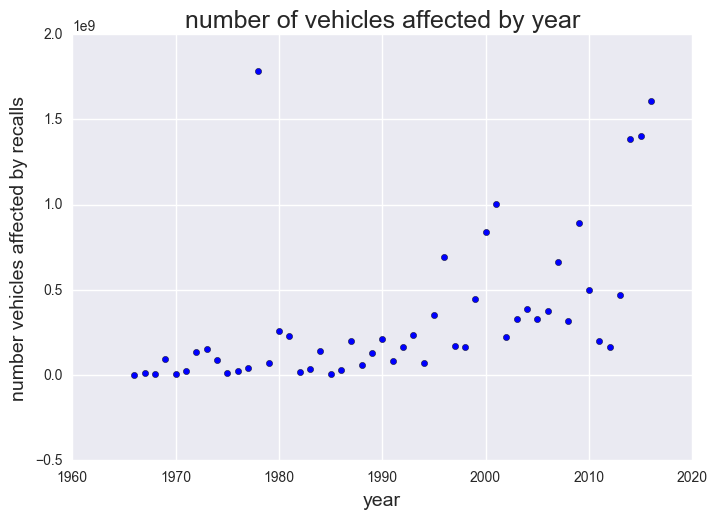

In [108]:
plt.scatter(years2, number_of_vehicles_per_year)
plt.xlabel('year', fontsize=14)
plt.ylabel('number vehicles affected by recalls', fontsize=14)
plt.title('number of vehicles affected by year', fontsize=18)
plt.show()

In [164]:
recalls_by_model_year = df.groupby('Model Year').size()
years_model_year = recalls_by_model_year.index.values[2:-3]
recalls_model_year = np.array(recalls_by_model_year.tolist()[2:-3])
recalls_by_model_year

Model Year
1949       1
1950       1
1951       1
1952       1
1953       1
1954       1
1955       4
1956       8
1957       8
1958       8
1959      10
1960      37
1961      45
1962      47
1963      42
1964      47
1965     108
1966     201
1967     376
1968     517
1969     522
1970     621
1971     844
1972     842
1973    1035
1974    1024
1975    1093
1976     949
1977    1090
1978    1177
        ... 
1990    1600
1991    1541
1992    1543
1993    1635
1994    1780
1995    2021
1996    2083
1997    2288
1998    2670
1999    3030
2000    3280
2001    3288
2002    3162
2003    3586
2004    3683
2005    3844
2006    4553
2007    4707
2008    4714
2009    4318
2010    4089
2011    4079
2012    3566
2013    3640
2014    3421
2015    2978
2016    2102
2017     610
2018       1
9999    6862
dtype: int64

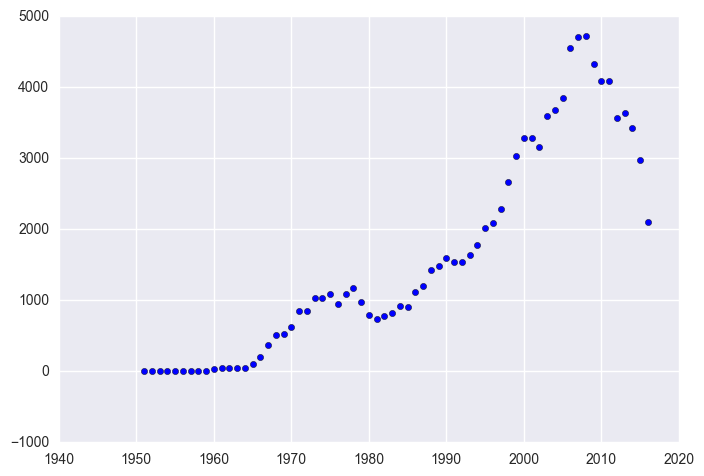

array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [163]:
plt.scatter(years_model_year, recalls_model_year)
plt.show()
years_model_year